BARMM Data Challenge (#BARMMOpenData)
---
SDG 3: Good Health and Well-being - Community-level response to health crises (COVID-19)
---
Predicting dengue using artificial neural network.
Data source: https://www.doh.gov.ph/statistics

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

Import dataset.
---
*   Independent variables = Humidity, Rainfall, Temperature.
*   Dependent variable = Dengue count

In [2]:
BARMM = pd.read_csv('dengue_climate_BARMM_subset.csv')
Region = BARMM['Region']
Year = BARMM['Year']
Month = BARMM['Month']
climate = ['Humidity', 'Rainfall', 'Temperature']
BARMM.head()

,Region,Year,Month,Date,Humidity,Rainfall,Temperature,Dengue_Count
0,BARMM,2013,January,1-Jan-2013,79,130.3,27.2,222.50
1,BARMM,2013,February,1-Feb-2013,75,149.2,28.2,107.63
2,BARMM,2013,March,1-Mar-2013,74,90.2,28.6,113.38
3,BARMM,2013,April,1-Apr-2013,76,163.2,28.6,146.83
4,BARMM,2013,May,1-May-2013,76,115.1,28.2,140.25


Descriptive statistics of BARMM dengue dataset.

In [3]:
BARMM.describe()

,Year,Humidity,Rainfall,Temperature,Dengue_Count
count,72.00000,72.00000,72.000000,72.000000,72.000000
mean,2015.50000,76.00000,160.070833,28.216597,157.257083
std,1.71981,2.69585,90.760557,0.659663,80.758194
min,2013.00000,68.00000,2.800000,26.800000,16.000000
25%,2014.00000,74.00000,88.550000,27.675000,104.750000
50%,2015.50000,77.00000,152.300000,28.177500,147.915000
75%,2017.00000,78.00000,222.150000,28.600000,181.000000
max,2018.00000,80.00000,393.400000,29.900000,495.000000



Log transformation
---
Create normally distributed data using log transformation.


In [4]:
Humidity = np.log(BARMM.Humidity +1)
Rainfall = np.log(BARMM.Rainfall +1)
Temperature = np.log(BARMM.Temperature +1)
Dengue_Count = np.log(BARMM.Dengue_Count +1)

Recreate new dataset containing the log transformed values of the variables.

In [5]:
Humidity = pd.DataFrame(Humidity, columns=['Humidity'])
Rainfall = pd.DataFrame(Rainfall, columns=['Rainfall'])
Temperature = pd.DataFrame(Temperature, columns=['Temperature'])
Dengue_Count = pd.DataFrame(Dengue_Count, columns=['Dengue_Count'])
BARMM = Humidity.join(Rainfall.join(Temperature.join(Dengue_Count)))
BARMM = pd.concat([Region, Year, Month, BARMM], axis=1)
BARMM.head()

,Region,Year,Month,Humidity,Rainfall,Temperature,Dengue_Count
0,BARMM,2013,January,4.382027,4.877485,3.339322,5.409411
1,BARMM,2013,February,4.330733,5.011968,3.374169,4.687948
2,BARMM,2013,March,4.317488,4.513055,3.387774,4.739526
3,BARMM,2013,April,4.343805,5.101085,3.387774,4.996063
4,BARMM,2013,May,4.343805,4.754452,3.374169,4.950531


Create training and test set
---
* Training set = Year 2013 to 2017
* Test set = Year 2018


In [6]:
BARMM_trainset = BARMM[(BARMM['Year'] < 2018)]
BARMM_train_climate = BARMM_trainset.loc[:, climate].values
BARMM_train_dengue = BARMM_trainset.iloc[:, -1].values
BARMM_testset = BARMM[(BARMM['Year'] == 2018)]
BARMM_test_climate = BARMM_testset.loc[:, climate].values
BARMM_test_dengue = BARMM_testset.iloc[:, -1].values

Create artificial neural network.
---
* 1 input layer (humidity, rainfall, temperature)
* 6 hidden layers
* 1 output (dengue count)
* activation function = rectified linear unit (relu)
* optimizer = adaptive moment estimator (adam)
* loss function = mean squared logarithmic error (msle)

In [7]:
BARMMann = tf.keras.models.Sequential()
BARMMann.add(tf.keras.layers.Dense(units=3, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=6, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=8, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=8, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=6, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=3, activation='relu'))
BARMMann.add(tf.keras.layers.Dense(units=1))
BARMMann.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')
BARMMann.fit(BARMM_train_climate, BARMM_train_dengue, batch_size = 40, epochs = 400)

Epoch 1/400
2/2 [==============================] - 1s 5ms/step - loss: 1.6800
Epoch 2/400
2/2 [==============================] - 0s 3ms/step - loss: 1.5049
Epoch 3/400
2/2 [==============================] - 0s 4ms/step - loss: 1.3596
Epoch 4/400
2/2 [==============================] - 0s 3ms/step - loss: 1.2592
Epoch 5/400
2/2 [==============================] - 0s 3ms/step - loss: 1.1678
Epoch 6/400
2/2 [==============================] - 0s 4ms/step - loss: 1.0732
Epoch 7/400
2/2 [==============================] - 0s 3ms/step - loss: 0.9853
Epoch 8/400
2/2 [==============================] - 0s 3ms/step - loss: 0.9055
Epoch 9/400
2/2 [==============================] - 0s 4ms/step - loss: 0.8258
Epoch 10/400
2/2 [==============================] - 0s 4ms/step - loss: 0.7636
Epoch 11/400
2/2 [==============================] - 0s 3ms/step - loss: 0.7051
Epoch 12/400
2/2 [==============================] - 0s 4ms/step - loss: 0.6443
Epoch 13/400
2/2 [==============================] - 0s 3ms/st

Predict dengue using the test set
---

In [8]:
predict_BARMM_dengue = BARMMann.predict(BARMM_test_climate)


Get the Mean Squared Logarithmic Error
---
MSLE is a quality estimator. It measures the ratio between true and predicted values.


In [9]:
msle = tf.keras.losses.MeanSquaredLogarithmicError()
BARMM_msle = msle(BARMM_test_dengue, predict_BARMM_dengue).numpy()

Compare the predicted from the actual values of dengue incidence
---
Plot the data to compare visually.
* blue = predicted dengue incidence
* red = actual dengue incidence

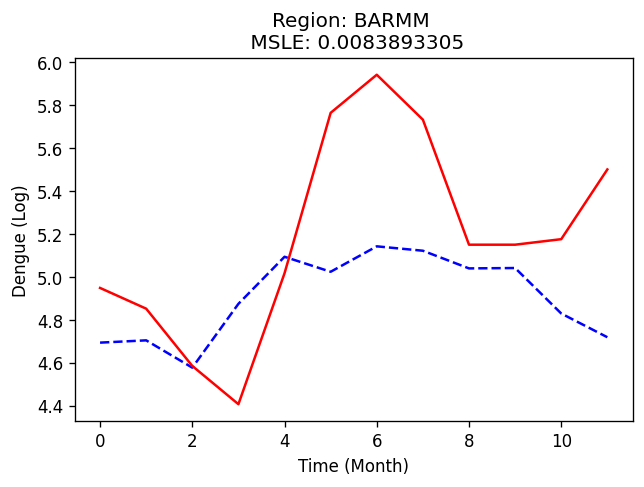

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=(120))
ax = plt.axes()
ax.set_title('Region: BARMM \n MSLE: '+str(BARMM_msle))
ax.set_ylabel('Dengue (Log)')
ax.set_xlabel('Time (Month)')
plt.plot(predict_BARMM_dengue, 'b--')
plt.plot(BARMM_test_dengue, 'r-')
plt.show()